In [ ]:
#OPENCV 설치
!pip install opencv-python

In [ ]:
import os
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
image_path = 'puppy.jpg'

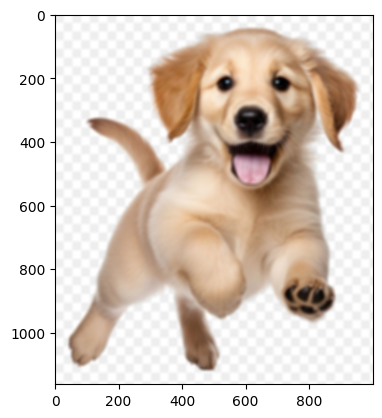

In [ ]:
image = cv2.imread(image_path)
# image
src = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# blur(적용할 이미지, 커널크기)
dst = cv2.blur(src, (11,11))
plt.imshow(dst)

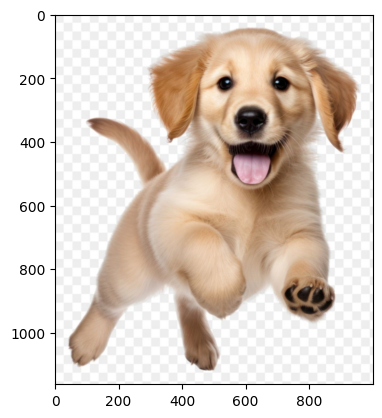

In [ ]:
dst_3 = cv2.blur(src, (3,3))
plt.imshow(dst_3)
# blur() : 모든 픽셀에 대해 동일한 가중치 부여

커널크기에 따라 blur 효과가 달라짐
- 3*3 커널 : 약간 흐림
- 5*5 커널: 중간적 흐림
- 11*11 커널 : 많이 흐림

왜 이런 일이?
- 작은 커널(3*3) : 주변에 9개 픽셀의 평균
  - 가까운 픽셀만 영향을 받음

- 큰 커널(11*11) : 주변에 121개 픽셀의 평균
  - 멀리 있는 픽셀도 영향을 받음



##### 커널 크기 규칙

- 홀수만 사용합니다
- 실제 사용
  -(3,3), (5,5),(7,7),(11,11)

- 왜 홀수인가요?
  - 중앙(값)이 명확 (명확한 중심점이 존재)


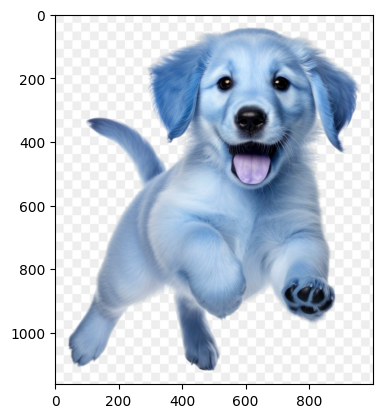

In [ ]:
plt.imshow(image) #원본(BGR)

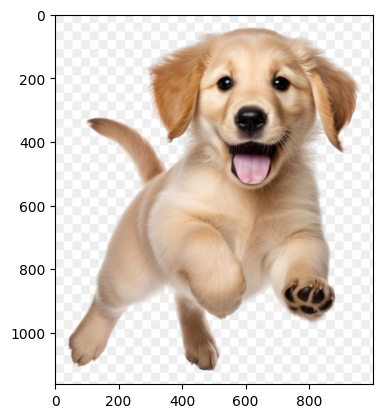

In [ ]:
plt.imshow(src) # 변경(RGB)

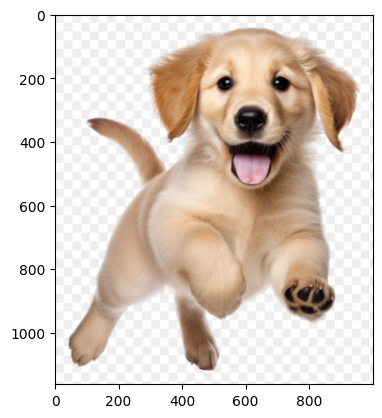

In [ ]:
plt.imshow(cv2.GaussianBlur(src, (3,3),  0))

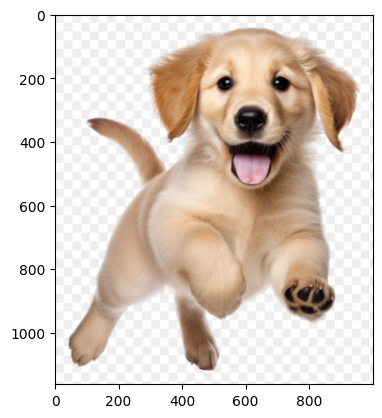

In [ ]:
# GaussianBlur() ksize=(3,3) 커널 사이즈
# sigmaX = 0 >> 0 이면 opencv 가 자동 계산

dst = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0)
plt.imshow(dst)
# GaussianBlur() : 중앙 픽셀에 더 큰 가중치 부여(가장 많이 사용함)

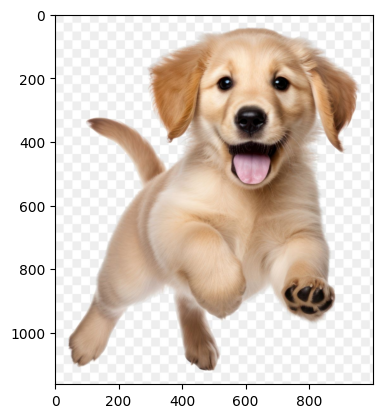

In [ ]:
# medianBlur()

dst = cv2.medianBlur(src, 3)
plt.imshow(dst)
# medianBlur(): median(중위수, 중앙값) 사용 (평균이 아니고)
# >> 평균의 큰 단점인 이상치(이미지에서는 noise)
# 3: 커널 사이즈 (3,3)

In [ ]:
픽셀값 = [10,20,30,200,40]

print(f'평균: {np.mean(픽셀값)}') # 60
print(f'중앙값: {np.median(픽셀값)}') # 30

평균: 60.0
중앙값: 30.0


침식(erosion), 팽창(dilate), 열기(opening), 닫기(closing)


In [ ]:
image_path = 'salt_black_white.png'

In [ ]:
# image_path = 'salt.jpg'

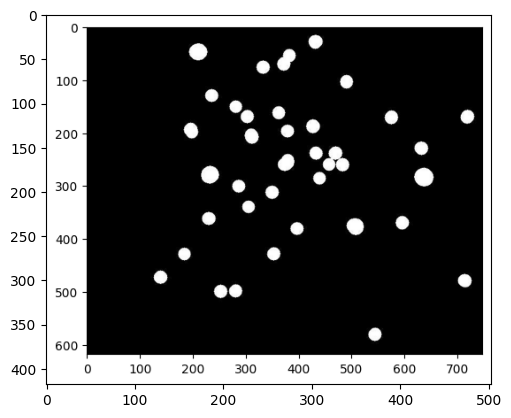

In [ ]:
src = cv2.imread(image_path)
plt.imshow(src)

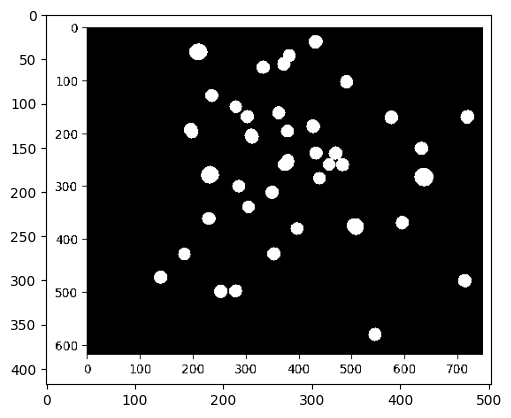

In [ ]:
#1. 이진화(Binary) - 0, 1 => 흑백 / 임계값(기준값)을 넘으면 255, 모자라면 0
#cv2.threshold(적용할 이미지, 임계값(기준), 기준을 넘으면? : 255로 만들어, 옵션)

result, binary_image = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
# 127 : 임계값 (기준). 255 : 임계값을 넘는 픽셀을 255로 만들어 (white)
# cv2.THRESH_BINARY 이진화 방식 채택

plt.imshow(binary_image)

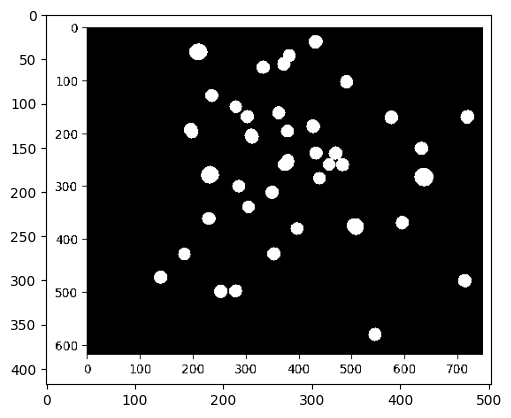

In [ ]:
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB), cmap='gray')

In [ ]:
# 커널 만들기
# np.empty(사이즈), np.zeros(사이즈)
# >> 사이즈 크기 만큼 비어있는 객체 생성 / 사이즈 크기 만큼 0으로 채워진 객체 생성

kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

팽창과 침식 적용
- erosion 침식
  - 흰색 영역(255)의 외곽을 깍아내는 연산
  - 커널이 완전히 흰색을 포함하는 영역만 유지, 나머지는 검정(0)으로 바꿔요
  - 객체가 작아져요(외곽이 깍였으니깐), 작은 노이즈 제거(작은 점 형태 흰색 잡음 제거)

- dialtion 확대(팽창)
  - 흰색 영역(255) 넓혀줘요
  - 커널이 1개 라도 흰색 만나면 중심 픽셀을 흰색으로 확장
  - 객체가 커져요(빈 공간 채워줘요), 끊긴 선 연결(문자, 윤곽선 연결), 구멍 채워줘요

실무 TIP)

1. Binary(0-255)
2. erosion(줄어들고 잡음 제거) 또는 dailtion(커짐, 끊김 영역 연결)

- 일반적으로 외부 노이즈가 문제면, opening 사용
- 내부 구멍이 문제면 closing 사용
- 둘 다 문제면 opening 사용 후, closing

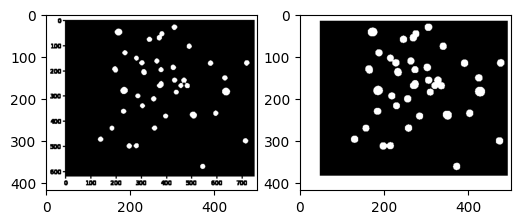

In [ ]:

erode_image = cv2.erode(binary_image, kernel, iterations=1)
dilate_image = cv2.dilate(binary_image, kernel, iterations=1)

fig, axes = plt.subplots(1,2, figsize=(6,3))

axes[0].imshow(erode_image)
axes[1].imshow(dilate_image)
plt.show()



- opening = erosion >> dilation
  - noise 제거 후, 모형 유지
- closing = dilation >> erosion
  - 끊긴 윤곽선 연결

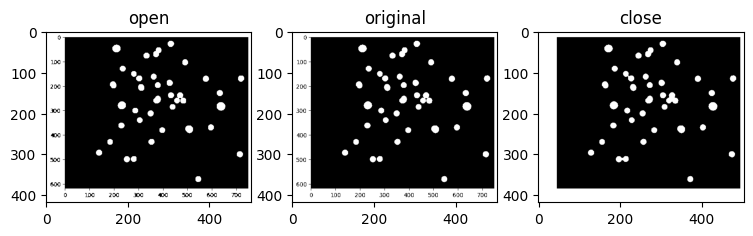

In [ ]:
# 이진화(binary) : 0 아니면 1 (흑백)
# 임계값(기준) 넘으면 255, 모자라면 0
# cv2.threshold(적용할 이미지, 임계값(기준), 기준을 넘으면? 255로 만들어)

result, binary_image = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
# plt.imshow(binary_image)

# 커널만들기
kernel = np.ones((3,3), np.uint8)

# 열기, 닫기
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 3, figsize=(9,3))

axes[0].imshow(opening)
axes[0].set_title('open')
axes[1].imshow(binary_image)
axes[1].set_title('original')
axes[2].imshow(closing)
axes[2].set_title('close')
plt.show()

In [ ]:
# eos